# Are Heart Rate and Blood Pressure related in some way between people with the same Physical Activity Level?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
Load the dataset into a pandas DataFrame.

In [4]:
dataset_path = r"C:\\Users\\Giacomo\\Desktop\\MagistraleDocumenti\\AAA - Data Visualization\\Python projects\\PROGETTO GIT\\Sleep_Data\\Sleep_health_and_lifestyle_dataset.csv"

df = pd.read_csv(dataset_path)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Calculate Mean Arterial Pressure (MAP)
Given that Blood Pressure is formatted as Max/Min, calculate the Mean Arterial Pressure (MAP) using the formula: MAP = [min + (max - min) / 3].

In [5]:
# Calculate Mean Arterial Pressure
def calculate_map(bp):
    max_bp, min_bp = map(int, bp.split('/'))
    return min_bp + (max_bp - min_bp) / 3

# Apply the function to calculate MAP for each user
df['MAP'] = df['Blood Pressure'].apply(calculate_map)

df[['Blood Pressure', 'MAP']].head()

,Blood Pressure,MAP
0,126/83,97.333333
1,125/80,95.000000
2,125/80,95.000000
3,140/90,106.666667
4,140/90,106.666667


# Combine Heart Rate, MAP, and Physical Activity Level in a single graph
Combine the Heart Rate, MAP, and Physical Activity Level data for each user.

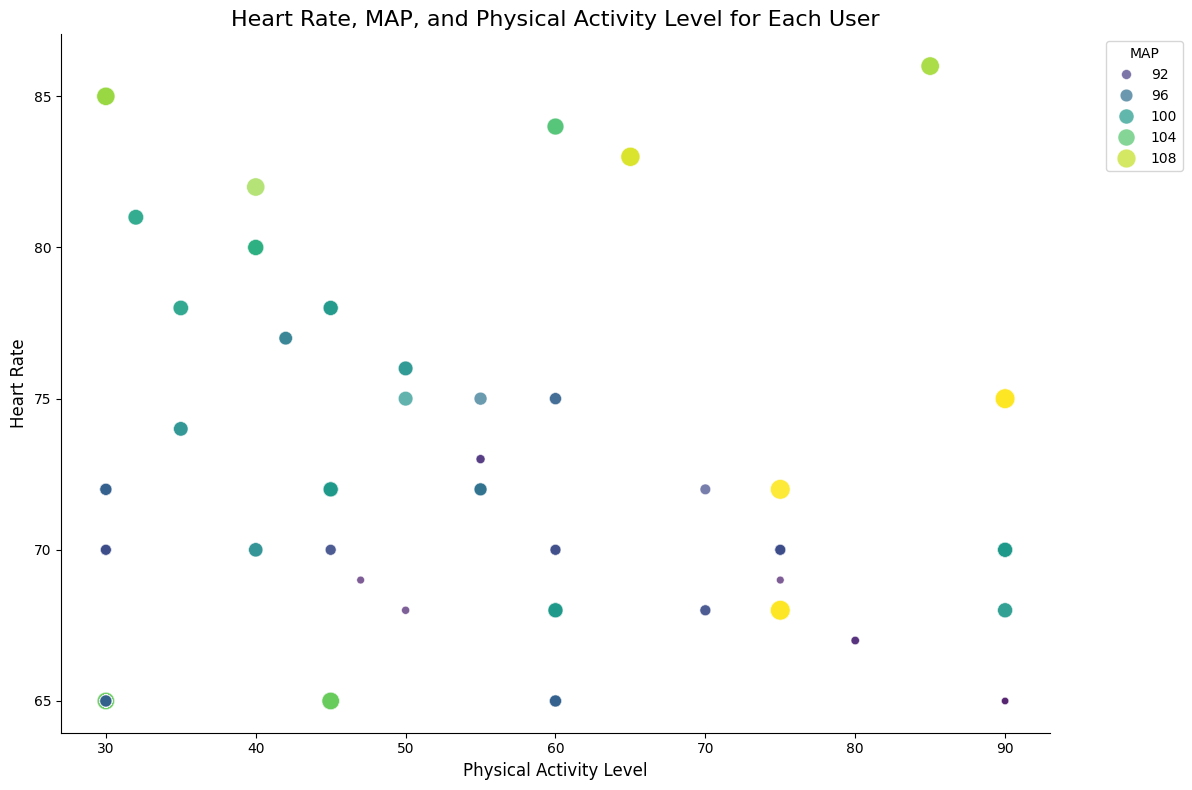

In [20]:
# Create a scatter plot to visualize the relationship between Heart Rate, MAP, and Physical Activity Level for each user
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x='Physical Activity Level', y='Heart Rate', hue='MAP', palette='viridis', size='MAP', sizes=(20, 200), alpha=0.7)
sns.despine()

plt.title('Heart Rate, MAP, and Physical Activity Level for Each User', fontsize=16)
plt.xlabel('Physical Activity Level', fontsize=12)
plt.ylabel('Heart Rate', fontsize=12)
plt.legend(title='MAP', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

## Aggregating by Physical Activity Level


The scatter plot is too cluttered, so let's aggregate the instances by Physical Activity Level, then plotting Heart Rate mean and MAP mean for each group

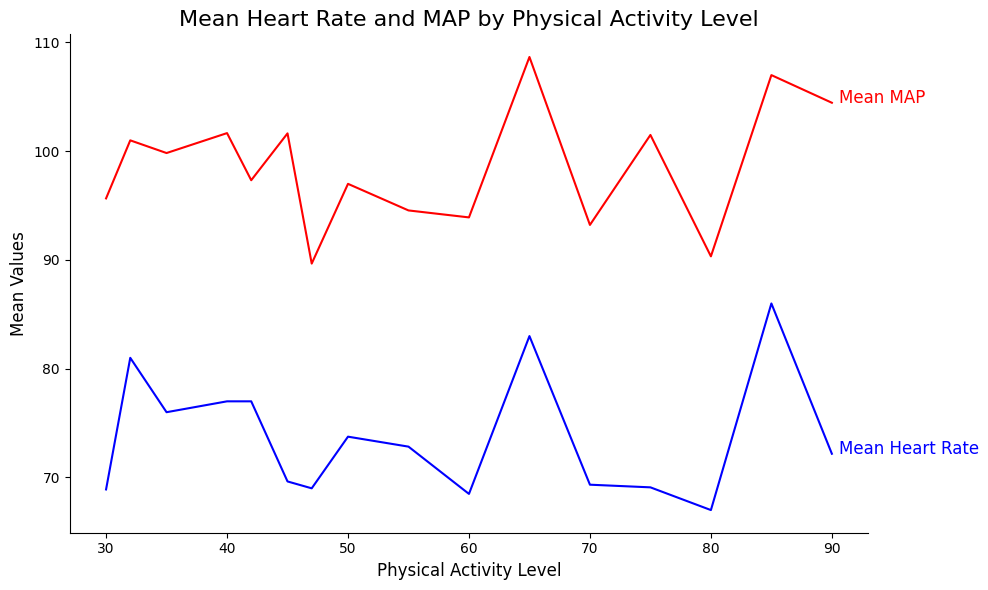

In [19]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
dataset = r"C:\\Users\\Giacomo\\Desktop\\MagistraleDocumenti\\AAA - Data Visualization\\Python projects\\PROGETTO GIT\\Sleep_Data\\Sleep_health_and_lifestyle_dataset.csv"
data = pd.read_csv(dataset)

# Calculate Mean Arterial Pressure (MAP)
def calculate_map(bp):
    max_bp, min_bp = map(int, bp.split('/'))
    return min_bp + (max_bp - min_bp) / 3

data['MAP'] = data['Blood Pressure'].apply(calculate_map)

# Aggregate Data by Physical Activity Level
aggregated_data = data.groupby('Physical Activity Level').agg({
    'Heart Rate': 'mean',
    'MAP': 'mean'
}).reset_index()

# Plot the Aggregated Data
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregated_data, x='Physical Activity Level', y='Heart Rate', label='Mean Heart Rate', color='b')
sns.lineplot(data=aggregated_data, x='Physical Activity Level', y='MAP', label='Mean MAP', color='r')
sns.despine()

# Add labels and title
plt.title('Mean Heart Rate and MAP by Physical Activity Level', fontsize=16)
plt.xlabel('Physical Activity Level', fontsize=12)
plt.ylabel('Mean Values', fontsize=12)

for line in plt.gca().lines:
    line_label = line.get_label()
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    plt.annotate(line_label, xy=(x_data[-1], y_data[-1]), xytext=(5, 0), textcoords='offset points', color=line.get_color(), fontsize=12)

plt.legend().remove()
plt.tight_layout()
plt.show()